**Machine Learning With Python : Linear Regression**
----------------------------------------------------

1) Imports necessary libraries : pandas, numpy, matplotlib, and scikit-learn.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import linear_model

2) Loads data: Reads a CSV file named "homeprices.csv" into a pandas DataFrame called df.

In [18]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


3) Visualizes data: Creates a scatter plot of area versus price using matplotlib.

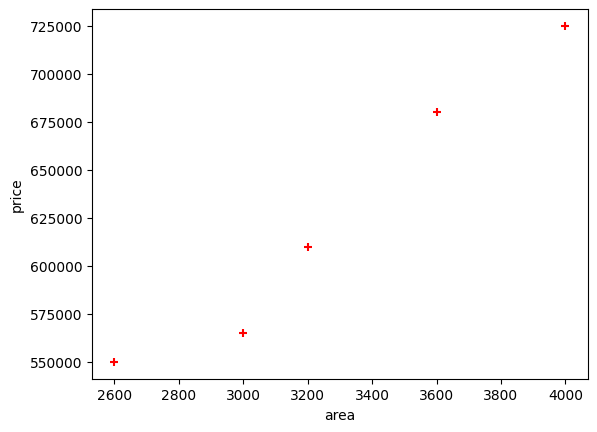

In [19]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

4) Prepares data for modeling: Creates a new DataFrame called new_df with only the 'area' column and assigns the 'price' column to a separate variable

In [20]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


from matplotlib import pyplot as plt
new_df['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['area']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'area'}, axis=1)
              .sort_values('area', ascending=True))
  xs = counted['area']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_df.sort_values('area', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('area')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
new_df['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
price = df.price
price

,price
0,550000
1,565000
2,610000
3,680000
4,725000


5) Trains a linear regression model: Creates a linear regression model using scikit-learn and trains it using the 'area' and 'price' data.

In [23]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

6) Makes predictions: Uses the trained model to predict the price of a home with an area of 3300 square feet

In [24]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

7) Prints model coefficients and intercept: Displays the coefficient and intercept of the linear regression mod

In [25]:
reg.coef_

array([135.78767123])

In [26]:
reg.intercept_

180616.43835616432

8) Calculates predicted price manually: Demonstrates how to calculate the predicted price using the model's equation.

In [27]:
# Y = m * X + b (m is coefficient and b is intercept)

3300*135.78767123 + 180616.43835616432

628715.7534151643

In [28]:
 # Predict price of a home with area = 5000 sqr ft

reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

9) Predicts prices for multiple areas: Reads a CSV file named "areas.csv" containing a list of areas and predicts the prices for each area using the trained model.

In [31]:
# Generate CSV file with list of home price predictions
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [32]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [35]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


10) Saves predictions to a file: Adds the predicted prices to the area_df DataFrame and saves it back to the "areas.csv" file.

In [37]:
area_df.to_csv("areas.csv")